In [18]:
import pandas as pd
import os
from rnalysis import filtering
import plotly
import numpy as np

In [19]:
os.getcwd()

'c:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\notebooks'

In [20]:
tbidata=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\tbi_data_files.csv')
#tbidata

In [21]:
tbidata

,donor_id,donor_name,specimen_id,specimen_name,rna_well,rna_integrity_number,structure_id,structure_acronym,structure_name,rnaseq_profile_id,rnaseq_total_reads,rnaseq_percent_reads_aligned_to_mrna,rnaseq_percent_reads_aligned_to_ncrna,rnaseq_percent_reads_aligned_to_genome_only,gene_level_fpkm_file_link,anonymized_bam_file_link,anonymized_bam_index_file_link,bigwig_file_link
0,309335438,H14.09.001,309357595,H14.09.001.HIP.05,320630832,7.3,10294,HIP,hippocampus (hippocampal formation),496100314,32275545,31.7,7.11,48.1,/api/v2/well_known_file_download/496128434,/api/v2/well_known_file_download/501023521,/api/v2/well_known_file_download/501023519,/api/v2/well_known_file_download/501056759
1,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,7.2,10557,FWM,white matter of forebrain,496100278,32515376,29.0,8.21,49.5,/api/v2/well_known_file_download/496106975,/api/v2/well_known_file_download/500938472,/api/v2/well_known_file_download/500938470,/api/v2/well_known_file_download/500941271
2,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630836,7.1,10208,PCx,parietal neocortex,496100290,34426215,29.1,6.59,52.1,/api/v2/well_known_file_download/496555481,/api/v2/well_known_file_download/500941225,/api/v2/well_known_file_download/500941223,/api/v2/well_known_file_download/500941630
3,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,7.3,10235,TCx,temporal neocortex,496100279,31714711,31.4,6.97,48.7,/api/v2/well_known_file_download/496106814,/api/v2/well_known_file_download/500936841,/api/v2/well_known_file_download/500936839,/api/v2/well_known_file_download/500941005
4,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,6.4,10294,HIP,hippocampus (hippocampal formation),496100281,33402591,29.5,7.21,50.6,/api/v2/well_known_file_download/496106950,/api/v2/well_known_file_download/500938896,/api/v2/well_known_file_download/500938894,/api/v2/well_known_file_download/500941300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,467056408,H15.09.109,467179122,H15.09.109.TCx.01,482655796,6.6,10235,TCx,temporal neocortex,496100650,41485057,26.8,6.50,54.9,/api/v2/well_known_file_download/496372690,/api/v2/well_known_file_download/501307834,/api/v2/well_known_file_download/501307832,/api/v2/well_known_file_download/501308010
373,467056409,H15.09.110,467179125,H15.09.110.HIP.01,482655798,6.8,10294,HIP,hippocampus (hippocampal formation),496100664,37271308,30.8,7.17,50.7,/api/v2/well_known_file_download/496551665,/api/v2/well_known_file_download/501305355,/api/v2/well_known_file_download/501305353,/api/v2/well_known_file_download/501307754
374,467056409,H15.09.110,467179128,H15.09.110.PCx.01,482655800,7.0,10557,FWM,white matter of forebrain,496100657,27665286,30.0,8.34,49.6,/api/v2/well_known_file_download/496549729,/api/v2/well_known_file_download/501265455,/api/v2/well_known_file_download/501265453,/api/v2/well_known_file_download/501269273
375,467056409,H15.09.110,467179128,H15.09.110.PCx.01,482655802,7.0,10208,PCx,parietal neocortex,496100653,30395673,31.8,7.63,48.3,/api/v2/well_known_file_download/496358437,/api/v2/well_known_file_download/501269458,/api/v2/well_known_file_download/501269456,/api/v2/well_known_file_download/501271208


In [22]:
donor=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\DonorInformation.csv')


In [53]:
exp_design=donor.merge(tbidata,how='left',left_on='donor_id',right_on='donor_id')[['rnaseq_profile_id','act_demented']]
exp_design.set_index('rnaseq_profile_id').rename(columns={'act_demented':'condition'}).to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\exp_design.csv')

In [24]:
# # read in files needed to be downloaded to get counts, create dataframe from these files, takes 20min

# file_links=tbidata['gene_level_fpkm_file_link'].to_list()
# for link in file_links:
#     if link==file_links[0]:
#         print("http://api.brain-map.org"+link)
#         df_gene_counts=pd.read_csv("http://api.brain-map.org"+link,delimiter='\\t')
#         df_gene_counts['link']=link
#     else:
#         file_link="http://api.brain-map.org"+link
#         new_file=pd.read_csv(file_link,delimiter='\\t')
#         new_file['link']=link
#         df_gene_counts=pd.concat([df_gene_counts,new_file])


# # df_gene_counts


In [25]:
# #save df as csv as to not repeat process
# df_gene_counts.to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\df_gene_counts.csv')

In [26]:
df_gene_counts=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\df_gene_counts.csv')


In [27]:
#df_gene_counts[df_gene_counts['gene_id']==3507]

In [28]:
genes=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\gene_expression_matrix_2016-03-03\\rows-genes.csv')


In [29]:
merge_table=df_gene_counts.merge(tbidata,left_on='link',right_on='gene_level_fpkm_file_link')

In [30]:
merge_table.columns

Index(['Unnamed: 0', 'gene_id', 'transcript_id(s)', 'length',
       'effective_length', 'expected_count', 'TPM', 'FPKM', 'link', 'donor_id',
       'donor_name', 'specimen_id', 'specimen_name', 'rna_well',
       'rna_integrity_number', 'structure_id', 'structure_acronym',
       'structure_name', 'rnaseq_profile_id', 'rnaseq_total_reads',
       'rnaseq_percent_reads_aligned_to_mrna',
       'rnaseq_percent_reads_aligned_to_ncrna',
       'rnaseq_percent_reads_aligned_to_genome_only',
       'gene_level_fpkm_file_link', 'anonymized_bam_file_link',
       'anonymized_bam_index_file_link', 'bigwig_file_link'],
      dtype='object')

In [31]:
genes=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\gene_expression_matrix_2016-03-03\\rows-genes.csv')
genes
mapping_dict_gene=dict(zip(genes['gene_entrez_id'],genes['gene_id']))
#mapping_dict_gene

In [32]:
total_counts=merge_table[['expected_count','TPM','FPKM','donor_id', 'donor_name',
       'specimen_id', 'specimen_name','structure_id', 'structure_acronym', 'structure_name',
       'rnaseq_profile_id','gene_id']]
total_counts['gene_id_mapped']=total_counts['gene_id'].map(mapping_dict_gene)
#total_counts

In [33]:
total_counts[total_counts['gene_id_mapped'].isna()]

,expected_count,TPM,FPKM,donor_id,donor_name,specimen_id,specimen_name,structure_id,structure_acronym,structure_name,rnaseq_profile_id,gene_id,gene_id_mapped
33446,0.0,0.00,0.00,309335438,H14.09.001,309357595,H14.09.001.HIP.05,10294,HIP,hippocampus (hippocampal formation),496100314,3502,NaN
33451,0.0,0.00,0.00,309335438,H14.09.001,309357595,H14.09.001.HIP.05,10294,HIP,hippocampus (hippocampal formation),496100314,3507,NaN
83729,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10557,FWM,white matter of forebrain,496100278,3502,NaN
83734,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10557,FWM,white matter of forebrain,496100278,3507,NaN
134012,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10208,PCx,parietal neocortex,496100290,3502,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18839293,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10557,FWM,white matter of forebrain,496100657,3507,NaN
18889571,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10208,PCx,parietal neocortex,496100653,3502,NaN
18889576,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10208,PCx,parietal neocortex,496100653,3507,NaN
18939854,0.0,0.00,0.00,467056409,H15.09.110,467179131,H15.09.110.TCx.01,10235,TCx,temporal neocortex,496100646,3502,NaN


In [34]:
unmapped_genes=list(total_counts[total_counts['gene_id_mapped'].isna()]['gene_id'].unique())

In [35]:
total_counts=total_counts.drop(total_counts[total_counts['gene_id'].isin(unmapped_genes)].index)

In [36]:
total_counts['expected_count']=np.round(total_counts['expected_count']).astype(int)
total_counts['gene_id_mapped']=total_counts['gene_id_mapped'].astype(int)


In [37]:
ct_matrix=total_counts[['gene_id_mapped','rnaseq_profile_id','expected_count']].pivot(index='gene_id_mapped',columns='rnaseq_profile_id', values='expected_count')
#ct_matrix

In [38]:
#ct_matrix.set_index('gene_id_mapped')

In [39]:
ct_matrix

rnaseq_profile_id,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id_mapped,,,,,,,,,,,,,,,,,,,,,
499304660,12,1,0,0,0,0,0,3,4,0,...,10,11,0,13,8,0,0,4,0,0
499304661,71,194,90,81,83,104,104,79,75,136,...,135,101,109,105,109,145,201,141,106,115
499304662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499304663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499304664,0,0,0,3,0,0,2,2,0,2,...,0,1,0,1,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499355059,337,188,242,364,368,420,329,288,265,511,...,432,349,307,639,482,481,343,388,467,329
499355060,0,0,1,0,2,2,0,3,0,4,...,1,0,0,2,2,0,0,1,5,1
499355061,5658,5006,4105,4788,4350,5922,3818,3807,5200,10299,...,6792,7016,6054,14007,8931,7448,6343,6841,7499,6235


In [40]:
ct_matrix.to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\ct_matrix.csv')

In [41]:
ct_matrix_filter=filtering.CountFilter('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\ct_matrix.csv',is_normalized=False)

In [42]:
ct_matrix_filter

CountFilter('C:/Users/dyeca/OneDrive/Documents/capstone/aging_dementia_tbi/data/ct_matrix.csv')

Estimating the optimal number of clusters using the Silhouette method in range 2:20...


Estimating the optimal number of clusters using the Silhouette method:   0%|          | 0/19 [00:00<?, ?K-valu…

Using the Silhouette method, 2 was chosen as the best number of clusters (k).


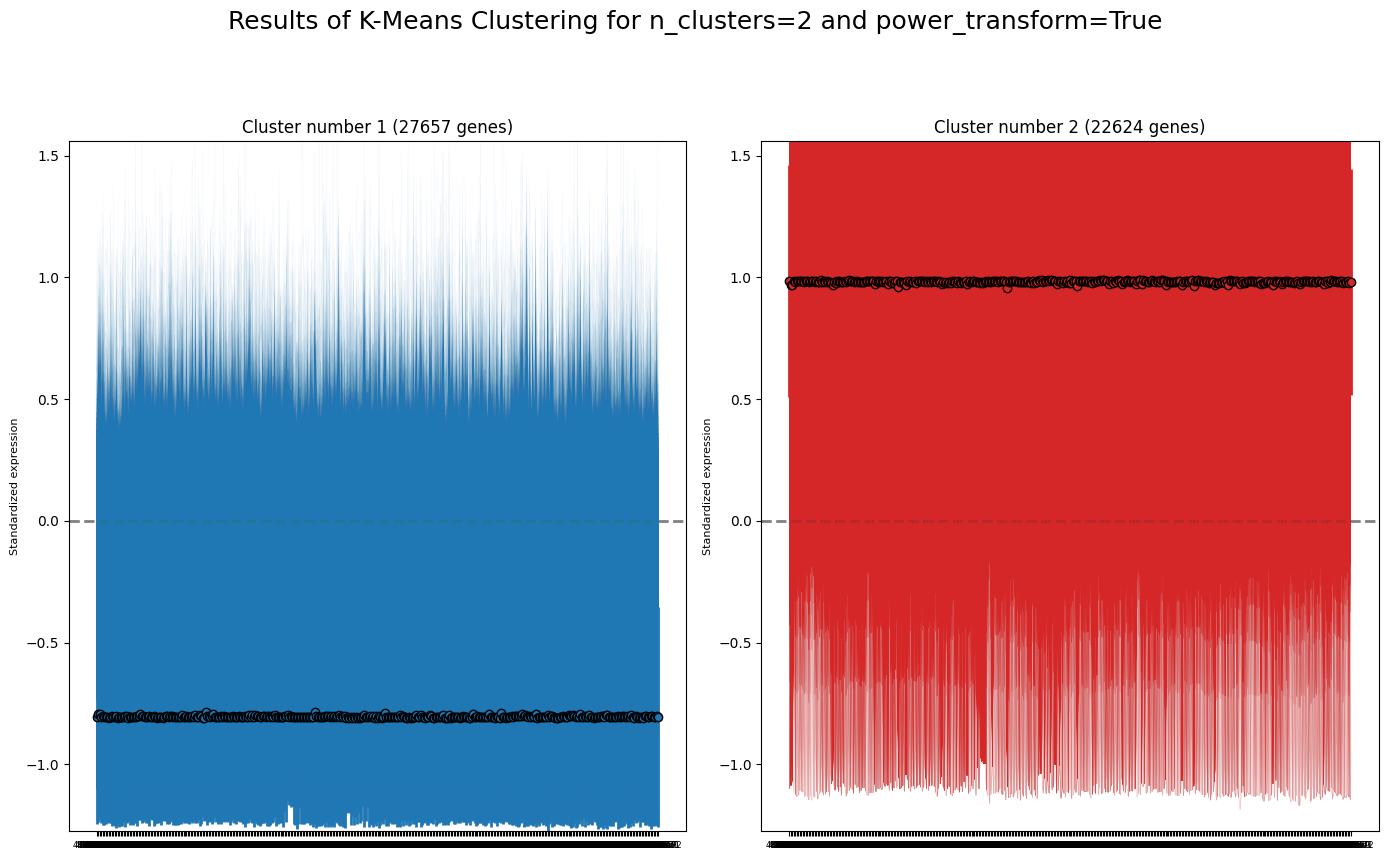

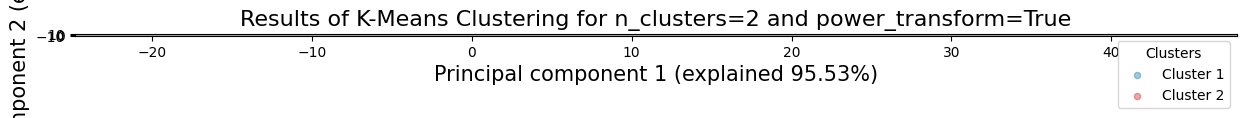

Filtered 22624 features, leaving 27657 of the original 50281 features. Filtering result saved to new object.
Filtered 27657 features, leaving 22624 of the original 50281 features. Filtering result saved to new object.


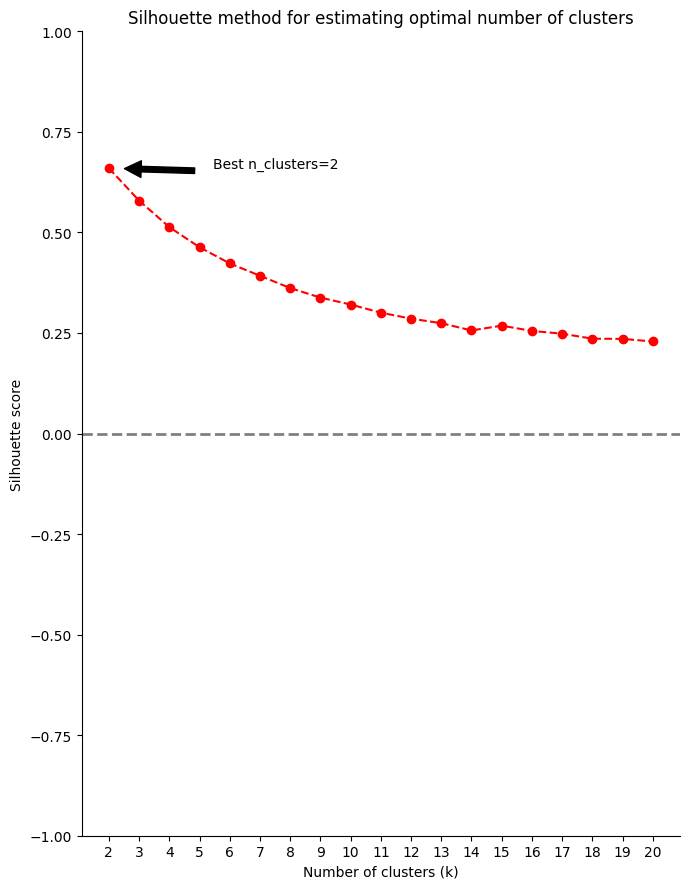

In [44]:
#maybe needs to be normalized?
silhouette_clusters = ct_matrix_filter.split_kmeans(n_clusters='silhouette')


In [54]:
ct_matrix_filter.differential_expression_deseq2(design_matrix='C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\exp_design.csv',comparisons=[('condition','Dementia','No Dementia')],r_installation_folder='C:\Program Files\R\R-4.3.2')



Attaching package: 'BiocGenerics'



The following objects are masked from 'package:stats':



    IQR, mad, sd, var, xtabs



The following objects are masked from 'package:base':



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,

    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,

    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,

    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,

    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,

    table, tapply, union, unique, unsplit, which.max, which.min





Attaching package: 'S4Vectors'



The following object is masked from 'package:utils':



    findMatches



The following objects are masked from 'package:base':



    expand.grid, I, unname





Attaching package: 'IRanges'



The following object is masked from 'package:grDevices':



    windows





Attaching package: 'MatrixGenerics'



The following objects are masked from 'package:matrixStats'

(DESeqFilter('C:/Users/dyeca/AppData/Local/RNAlysis/RNAlysis/Cache/2023_10_31/c4f144a5bdcd99fd6b3fccfe789b50065ded3d0a/DESeq2_condition_Dementia_vs_No Dementia.csv'),)